In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('churn_all.csv')

In [7]:
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,State,Latitude,Longitude,ZipCode,PhoneService,...,TechSupport,StreamingTV,StreamingMovies,Tenure,Contract,PaymentMethod,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,3668-QPYBK,Male,No,No,No,California,33.964131,-118.272783,90003,Yes,...,No,No,No,2,Month-to-month,Mailed check,Yes,53.85,108.15,Yes
1,9237-HQITU,Female,No,No,Yes,California,34.059281,-118.307420,90005,Yes,...,No,No,No,2,Month-to-month,Electronic check,Yes,70.70,151.65,Yes
2,9305-CDSKC,Female,No,No,Yes,California,34.048013,-118.293953,90006,Yes,...,No,Yes,Yes,8,Month-to-month,Electronic check,Yes,99.65,820.50,Yes
3,7892-POOKP,Female,No,Yes,Yes,California,34.062125,-118.315709,90010,Yes,...,Yes,Yes,Yes,28,Month-to-month,Electronic check,Yes,104.80,3046.05,Yes
4,0280-XJGEX,Male,No,No,Yes,California,34.039224,-118.266293,90015,Yes,...,No,Yes,Yes,49,Month-to-month,Bank transfer (automatic),Yes,103.70,5036.30,Yes


In [26]:
# nan_values = df.isna().sum()
print(nan_values,'\n')

CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
State               0
Latitude            0
Longitude           0
ZipCode             0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Tenure              0
Contract            0
PaymentMethod       0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64 



In [25]:
num_valores_unicos = df.nunique()

# Mostrar el resultado
num_valores_unicos

CustomerID          7032
Gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
State                  1
Latitude            1652
Longitude           1651
ZipCode             1652
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Tenure                72
Contract               3
PaymentMethod          4
PaperlessBilling       2
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [27]:
columns_del = ['CustomerID','Gender','State', 'ZipCode',
             'Latitude', 'Longitude','StreamingTV']
df.drop(columns_del, axis=1, inplace=True)

In [28]:
print('El dataset tiene', df.shape[0], ' unique customers')
print('El Dataset tiene', df.shape[1], ' features')

El dataset tiene 7032  unique customers
El Dataset tiene 18  features


In [31]:
# Mostrar el resultado
num_valores_unicos = df.nunique()
num_valores_unicos

SeniorCitizen          2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingMovies        3
Tenure                72
Contract               3
PaymentMethod          4
PaperlessBilling       2
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

### Encoding de categorias binarias. el encoding se hace para convertir variables categoricas en numéricas, ya que tenemos varias de ellas que tienen Si y No como respuesta, en este caso usare Varios tipos de encoding.

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
7027    Yes
7028    Yes
7029    Yes
7030     No
7031    Yes
Name: PhoneService, Length: 7032, dtype: object

In [46]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

In [44]:
columnas = ['Partner', 'SeniorCitizen', 'PhoneService', 'Churn', 'PaperlessBilling', 'Dependents']
for columna in columnas:
    df[columna] = le.fit_transform(df[columna])

In [45]:
# OneHotEncodign a caracteristicas que son mas de tres pero no hay un orden especifico entre ellas
columnas2 = ['InternetService', 'Contract', 'PaymentMethod']

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Tenure,Contract,PaymentMethod,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,No,DSL,Yes,Yes,No,No,No,2,Month-to-month,Mailed check,1,53.85,108.15,1
1,0,0,1,1,No,Fiber optic,No,No,No,No,No,2,Month-to-month,Electronic check,1,70.70,151.65,1
2,0,0,1,1,Yes,Fiber optic,No,No,Yes,No,Yes,8,Month-to-month,Electronic check,1,99.65,820.50,1
3,0,1,1,1,Yes,Fiber optic,No,No,Yes,Yes,Yes,28,Month-to-month,Electronic check,1,104.80,3046.05,1
4,0,0,1,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,49,Month-to-month,Bank transfer (automatic),1,103.70,5036.30,1


In [216]:
columnas2 = ['InternetService', 'Contract', 'PaymentMethod']

# Aplica Get Dummies a las columnas seleccionadas
df_new = pd.get_dummies(df, columns=columnas2)

In [217]:
df_new.columns.values

array(['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingMovies', 'Tenure',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype=object)

In [218]:
columns_del = ['MultipleLines','OnlineSecurity','OnlineBackup', 'DeviceProtection',
             'TechSupport', 'StreamingMovies','StreamingMovies']
df_new.drop(columns_del, axis=1, inplace=True)

In [219]:
df_new.head()

,SeniorCitizen,Partner,Dependents,PhoneService,Tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,2,1,53.85,108.15,1,True,False,False,True,False,False,False,False,False,True
1,0,0,1,1,2,1,70.70,151.65,1,False,True,False,True,False,False,False,False,True,False
2,0,0,1,1,8,1,99.65,820.50,1,False,True,False,True,False,False,False,False,True,False
3,0,1,1,1,28,1,104.80,3046.05,1,False,True,False,True,False,False,False,False,True,False
4,0,0,1,1,49,1,103.70,5036.30,1,False,True,False,True,False,False,True,False,False,False


In [220]:
import pandas as pd

# Calcular la matriz de correlación
correlation_matrix = df_new.corr()

# Obtener las correlaciones con la variable objetivo
target_correlations = correlation_matrix['Churn'].sort_values(ascending=False)

# Imprimir las correlaciones
print(target_correlations)

Churn                                      1.000000
Contract_Month-to-month                    0.404565
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
MonthlyCharges                             0.192858
PaperlessBilling                           0.191454
SeniorCitizen                              0.150541
PhoneService                               0.011691
PaymentMethod_Mailed check                -0.090773
PaymentMethod_Bank transfer (automatic)   -0.118136
InternetService_DSL                       -0.124141
PaymentMethod_Credit card (automatic)     -0.134687
Partner                                   -0.149982
Contract_One year                         -0.178225
TotalCharges                              -0.199484
InternetService_No                        -0.227578
Dependents                                -0.248140
Contract_Two year                         -0.301552
Tenure                                    -0.354049
Name: Churn,

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

<Axes: >

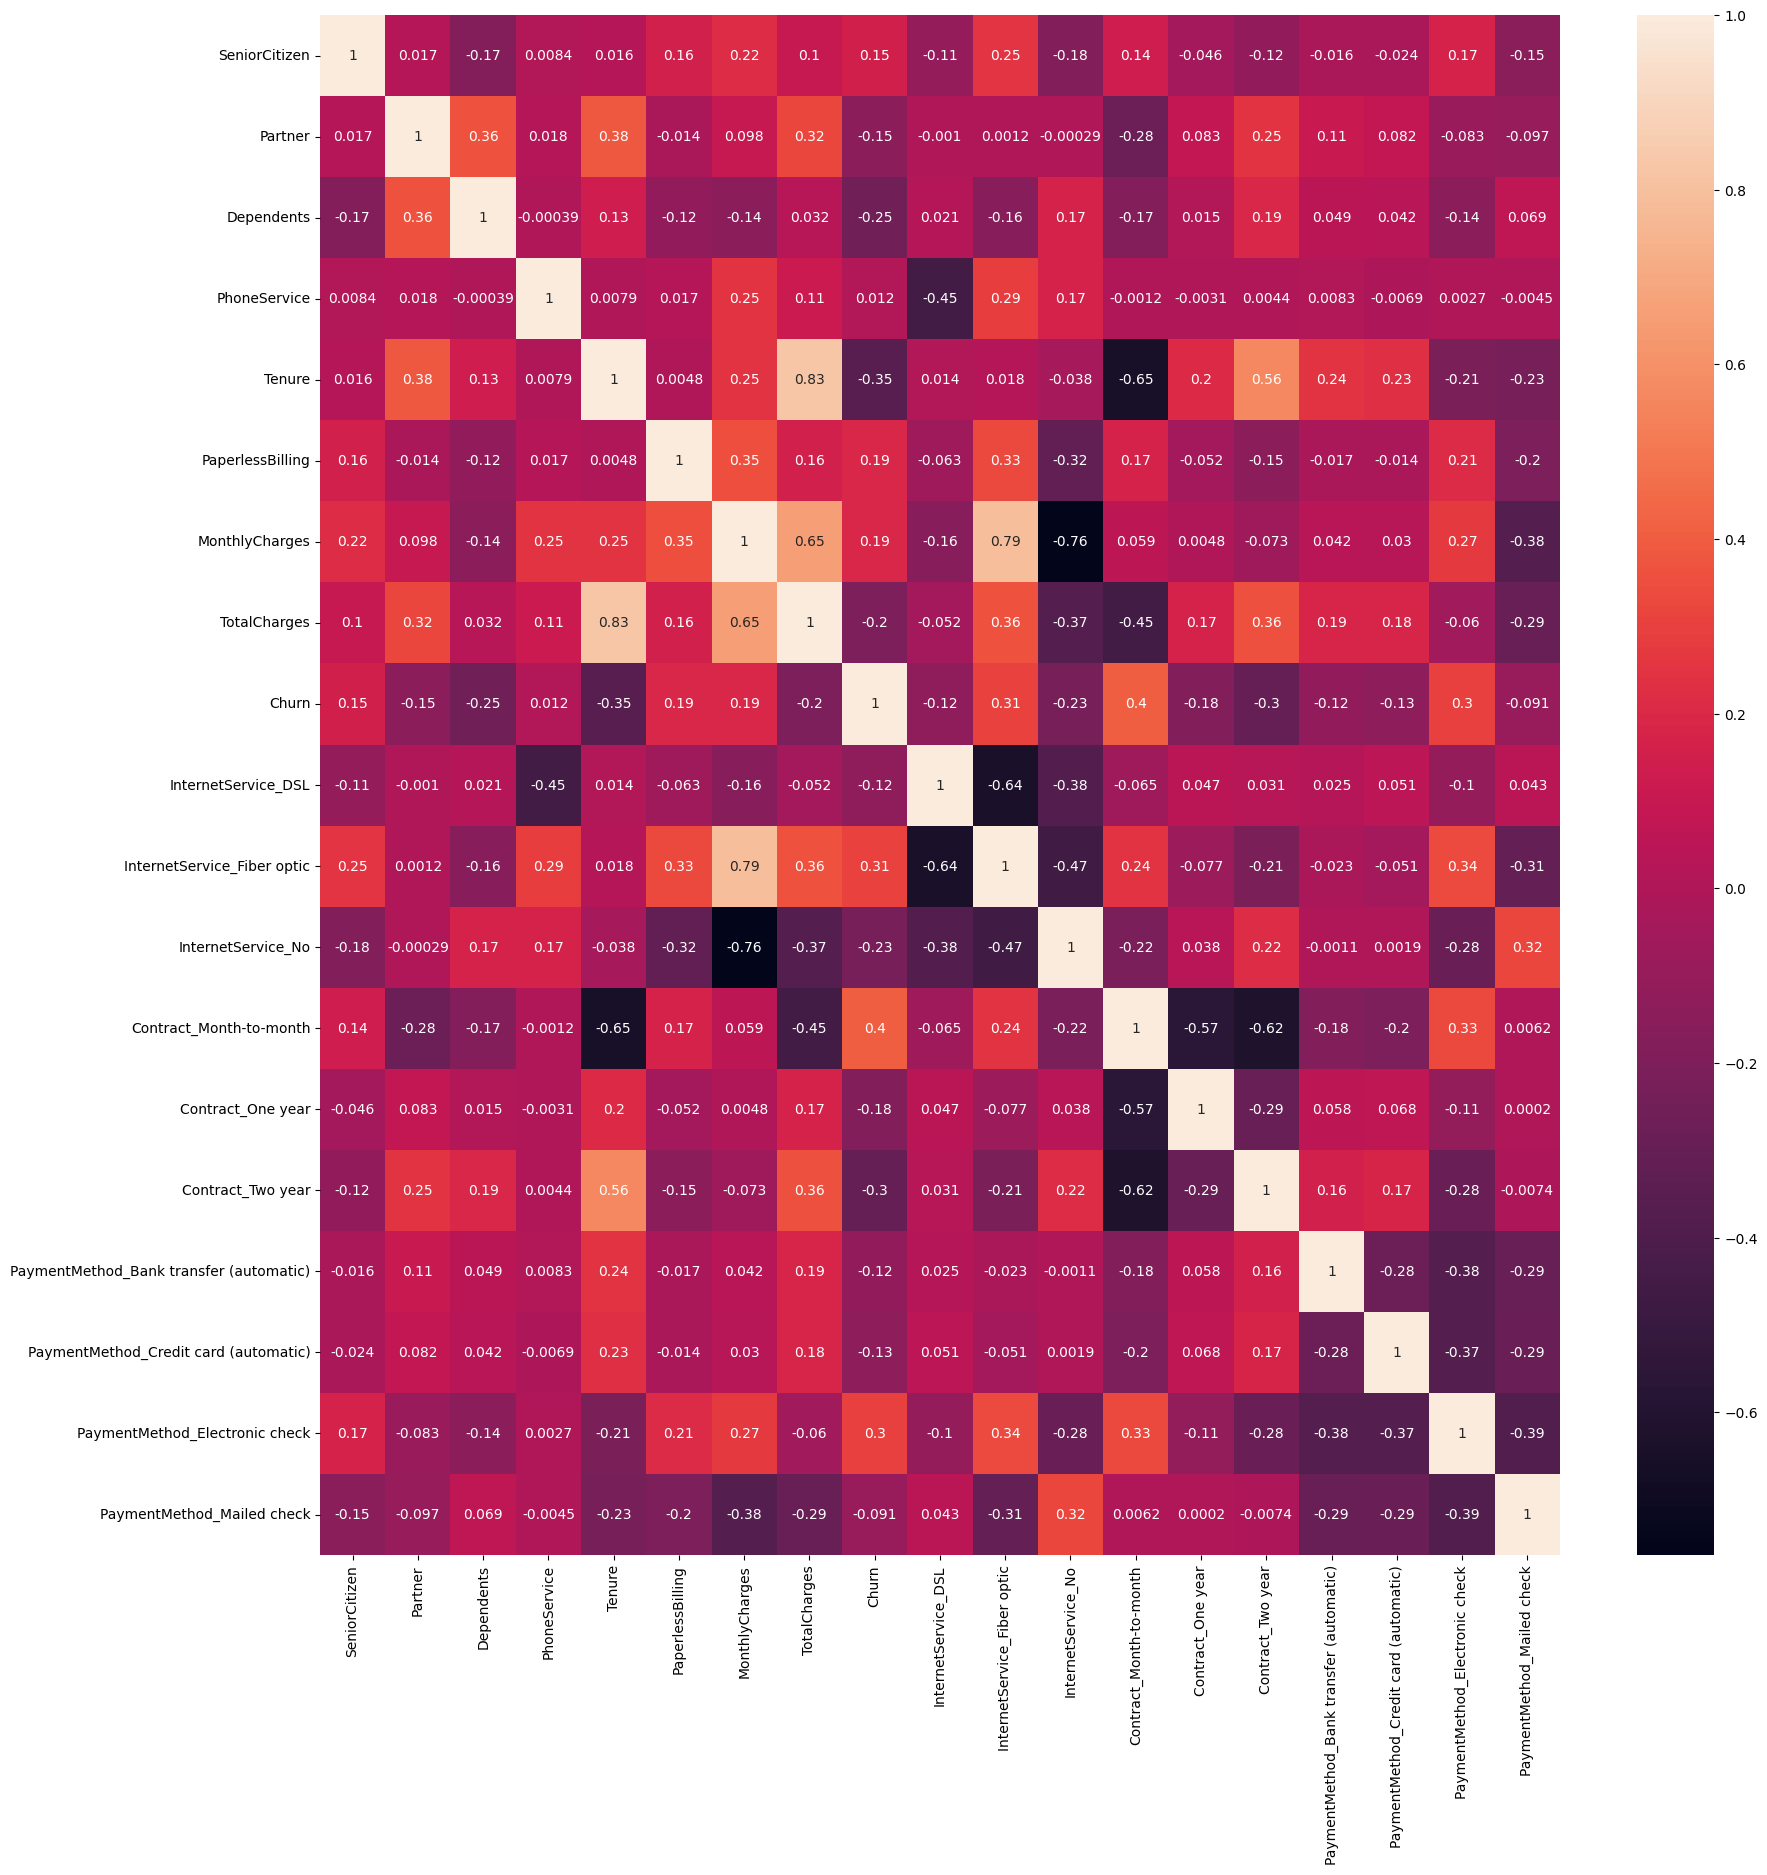

In [221]:
plt.figure(figsize=(20,20))
churn_corr = df_new.corr()
churn_corr_top = churn_corr.index
sns.heatmap(df_new[churn_corr_top].corr(), annot=True)

In [96]:
# df_new.dtypes

<Axes: >

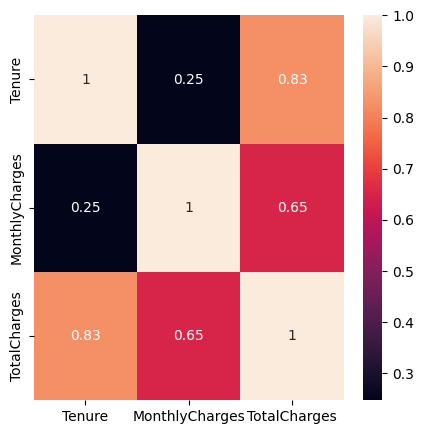

In [222]:
#Queda Visualizar nuestras variables numericas
plt.figure(figsize=(5,5))
numCorr = df_new[['Tenure', 'MonthlyCharges', 'TotalCharges']].corr()

# Visualicemos la matriz de correlación

numCorr_top = numCorr.index
sns.heatmap(df_new[numCorr_top].corr(), annot=True)

Hay una alta correlación entre la tenure y TotalCharges

Intuitivamente cuanto más tiempo haya estado un cliente en la empresa, más habrá pagado.

A pesar de la alta correlación entre las dos características, no es suficiente para justificar la eliminación de una de ellas porque no están excesivamente correlacionadas.

Hay una correlación moderada entre MonthlyCharges y TotalCharges

Tiene sentido que cuanto más pague mensualmente, más habrá gastado en general.

La razón por la que MonthlyCharges no está tan correlacionada con TotalCharges como Tenure, se puede deber a que el modelo de negocio de una Telecom es basado en subscripcion de clientes en el tiempo

Hay una correlación baja entre la permanencia y los cargos mensuales

In [111]:
# Vamos a standarizar y scalar las tres variables numericas.

In [223]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Carga tu conjunto de datos en un DataFrame de pandas
# Selecciona las columnas que deseas escalar
data = df_new[['MonthlyCharges', 'TotalCharges', 'Tenure']]

# Crea una instancia de StandardScaler
scaler = StandardScaler()

# Ajusta y transforma los datos seleccionados
scaled_data = scaler.fit_transform(data)

# Convierte el resultado a un DataFrame de pandas
scaled_df = pd.DataFrame(scaled_data, columns=['MonthlyCharges', 'TotalCharges', 'Tenure'])

# Imprime el DataFrame escalado
print(scaled_df)

      MonthlyCharges  TotalCharges    Tenure
0          -0.363923     -0.959649 -1.239504
1           0.196178     -0.940457 -1.239504
2           1.158489     -0.645369 -0.995040
3           1.329677      0.336516 -0.180161
4           1.293113      1.214589  0.675462
...              ...           ...       ...
7027       -1.450886     -0.381142  1.612573
7028        0.664868     -0.129180 -0.343137
7029        1.276493      2.241056  1.612573
7030       -1.170004     -0.854514 -0.872808
7031        1.357932      2.012344  1.368109

[7032 rows x 3 columns]


In [224]:
scaled_df

,MonthlyCharges,TotalCharges,Tenure
0,-0.363923,-0.959649,-1.239504
1,0.196178,-0.940457,-1.239504
2,1.158489,-0.645369,-0.995040
3,1.329677,0.336516,-0.180161
4,1.293113,1.214589,0.675462
...,...,...,...
7027,-1.450886,-0.381142,1.612573
7028,0.664868,-0.129180,-0.343137
7029,1.276493,2.241056,1.612573
7030,-1.170004,-0.854514,-0.872808


In [225]:
df_new[['MonthlyCharges', 'TotalCharges', 'Tenure']] = scaled_data

In [94]:
dfStre = df.copy()

In [103]:
columnas2 = ['InternetService', 'Contract', 'PaymentMethod']

# Aplica Get Dummies a las columnas seleccionadas
dfStre = pd.get_dummies(df, columns=columnas2)

In [106]:
dfStre.columns.values

array(['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingMovies', 'Tenure',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype=object)

In [107]:
columnas = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingMovies']
for columna in columnas:
    dfStre[columna] = le.fit_transform(dfStre[columna])

In [121]:
dfStre # Dataset encodeado pero sin estandarizar variables numericas y con los datos de streaming

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,0,2,2,0,0,0,...,True,False,False,True,False,False,False,False,False,True
1,0,0,1,1,0,0,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False
2,0,0,1,1,2,0,0,2,0,2,...,False,True,False,True,False,False,False,False,True,False
3,0,1,1,1,2,0,0,2,2,2,...,False,True,False,True,False,False,False,False,True,False
4,0,0,1,1,2,0,2,2,0,2,...,False,True,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,0,1,0,1,1,1,1,1,...,False,False,True,False,False,True,True,False,False,False
7028,0,1,1,1,2,2,0,2,2,2,...,True,False,False,False,True,False,False,False,False,True
7029,0,1,1,1,2,0,2,2,0,2,...,False,True,False,False,True,False,False,True,False,False
7030,0,1,1,0,1,2,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False


<Axes: >

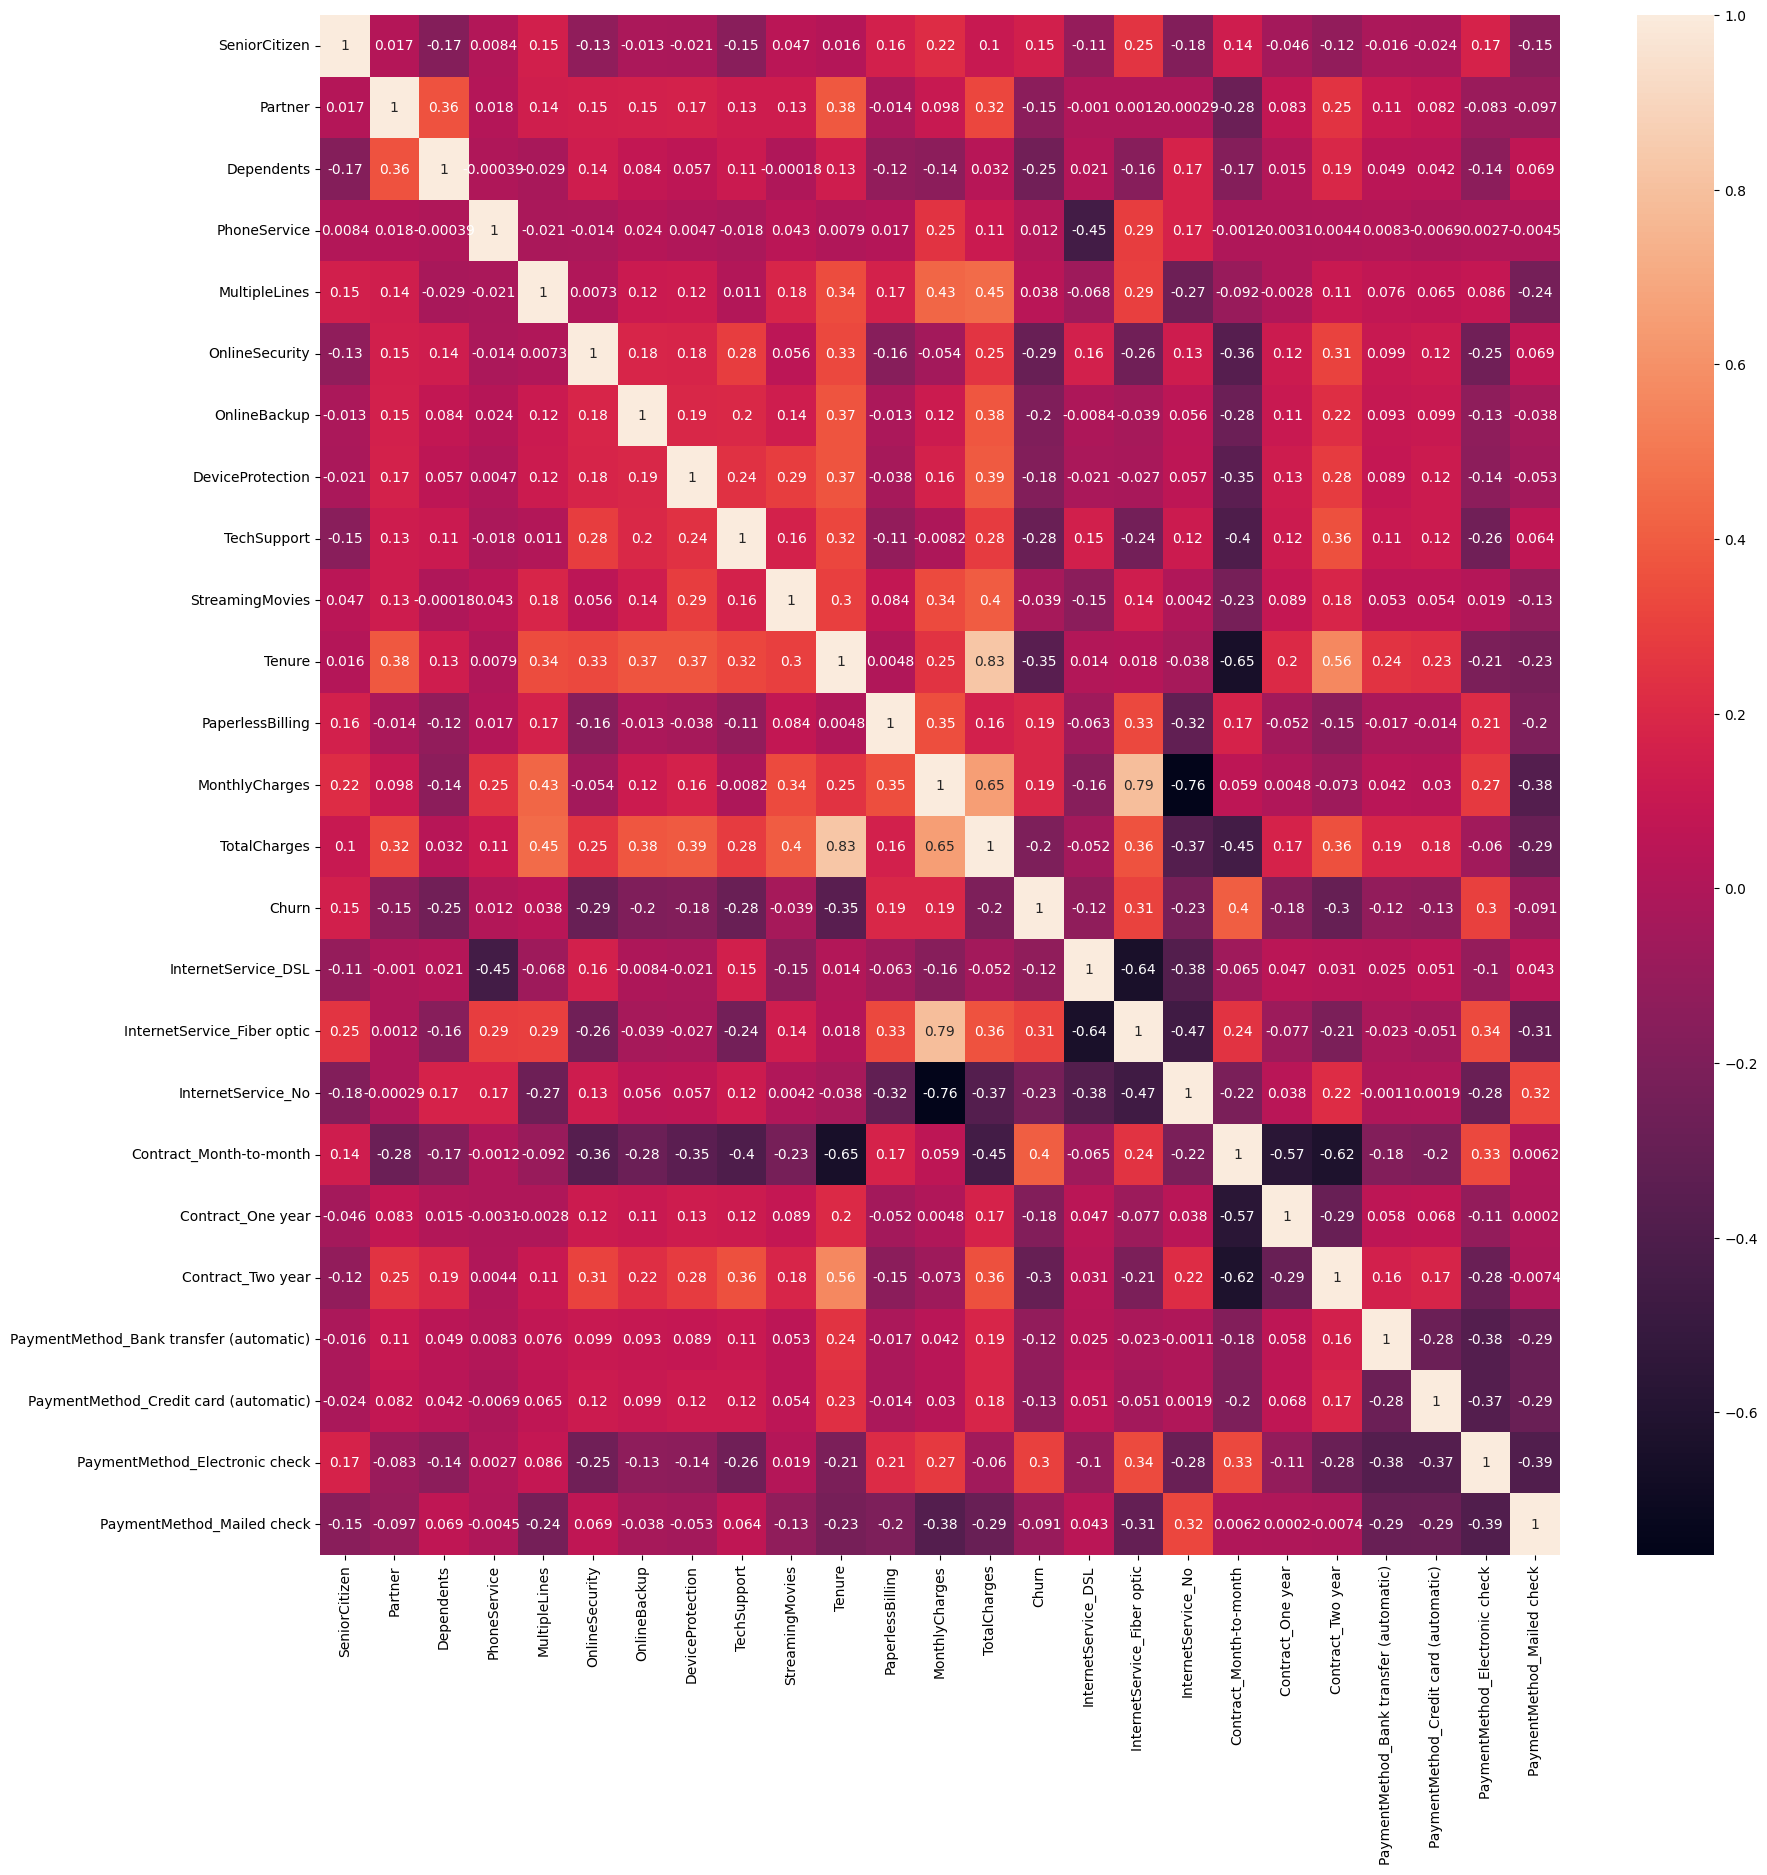

In [110]:
plt.figure(figsize=(20,20))
corr1 = dfStre.corr()
corr1_top = corr1.index
sns.heatmap(dfStre[corr1_top].corr(), annot=True)

In [123]:
dfStre.columns.values

array(['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingMovies', 'Tenure',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype=object)

In [125]:
numCorr.index

Index(['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup'], dtype='object')

## Vamos a construir unos modelos con los datos de df_new que tiene las variables escaladas y estandarizadas. ademas de que le aplicamos encoding a las variables que lo necesitaban.

In [226]:
df_new

,SeniorCitizen,Partner,Dependents,PhoneService,Tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,-1.239504,1,-0.363923,-0.959649,1,True,False,False,True,False,False,False,False,False,True
1,0,0,1,1,-1.239504,1,0.196178,-0.940457,1,False,True,False,True,False,False,False,False,True,False
2,0,0,1,1,-0.995040,1,1.158489,-0.645369,1,False,True,False,True,False,False,False,False,True,False
3,0,1,1,1,-0.180161,1,1.329677,0.336516,1,False,True,False,True,False,False,False,False,True,False
4,0,0,1,1,0.675462,1,1.293113,1.214589,1,False,True,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,0,1,1.612573,1,-1.450886,-0.381142,0,False,False,True,False,False,True,True,False,False,False
7028,0,1,1,1,-0.343137,1,0.664868,-0.129180,0,True,False,False,False,True,False,False,False,False,True
7029,0,1,1,1,1.612573,1,1.276493,2.241056,0,False,True,False,False,True,False,False,True,False,False
7030,0,1,1,0,-0.872808,1,-1.170004,-0.854514,0,True,False,False,True,False,False,False,False,True,False


In [227]:
X = df_new.drop('Churn', axis=1)
y = df_new['Churn']

In [228]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [229]:
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)


Forma de X_train: (5625, 18)
Forma de X_test: (1407, 18)
Forma de y_train: (5625,)
Forma de y_test: (1407,)


In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [231]:
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [232]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Logistic Regression
lr_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred)

print("Logistic Regression:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1-score:", lr_f1)
print("Classification Report:\n", lr_report)

# Decision Tree
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)
dt_report = classification_report(y_test, dt_pred)

print("Decision Tree:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1-score:", dt_f1)
print("Classification Report:\n", dt_report)

# Random Forest
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred)

print("Random Forest:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)
print("Classification Report:\n", rf_report)


Logistic Regression:
Accuracy: 0.8081023454157783
Precision: 0.6529411764705882
Recall: 0.5935828877005348
F1-score: 0.6218487394957983
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      1033
           1       0.65      0.59      0.62       374

    accuracy                           0.81      1407
   macro avg       0.76      0.74      0.75      1407
weighted avg       0.80      0.81      0.81      1407

Decision Tree:
Accuracy: 0.7199715707178393
Precision: 0.4744897959183674
Recall: 0.49732620320855614
F1-score: 0.4856396866840731
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      1033
           1       0.47      0.50      0.49       374

    accuracy                           0.72      1407
   macro avg       0.64      0.65      0.65      1407
weighted avg       0.72      0.72      0.72      1407

Random Forest:
Accuracy: 0.7832

<Axes: >

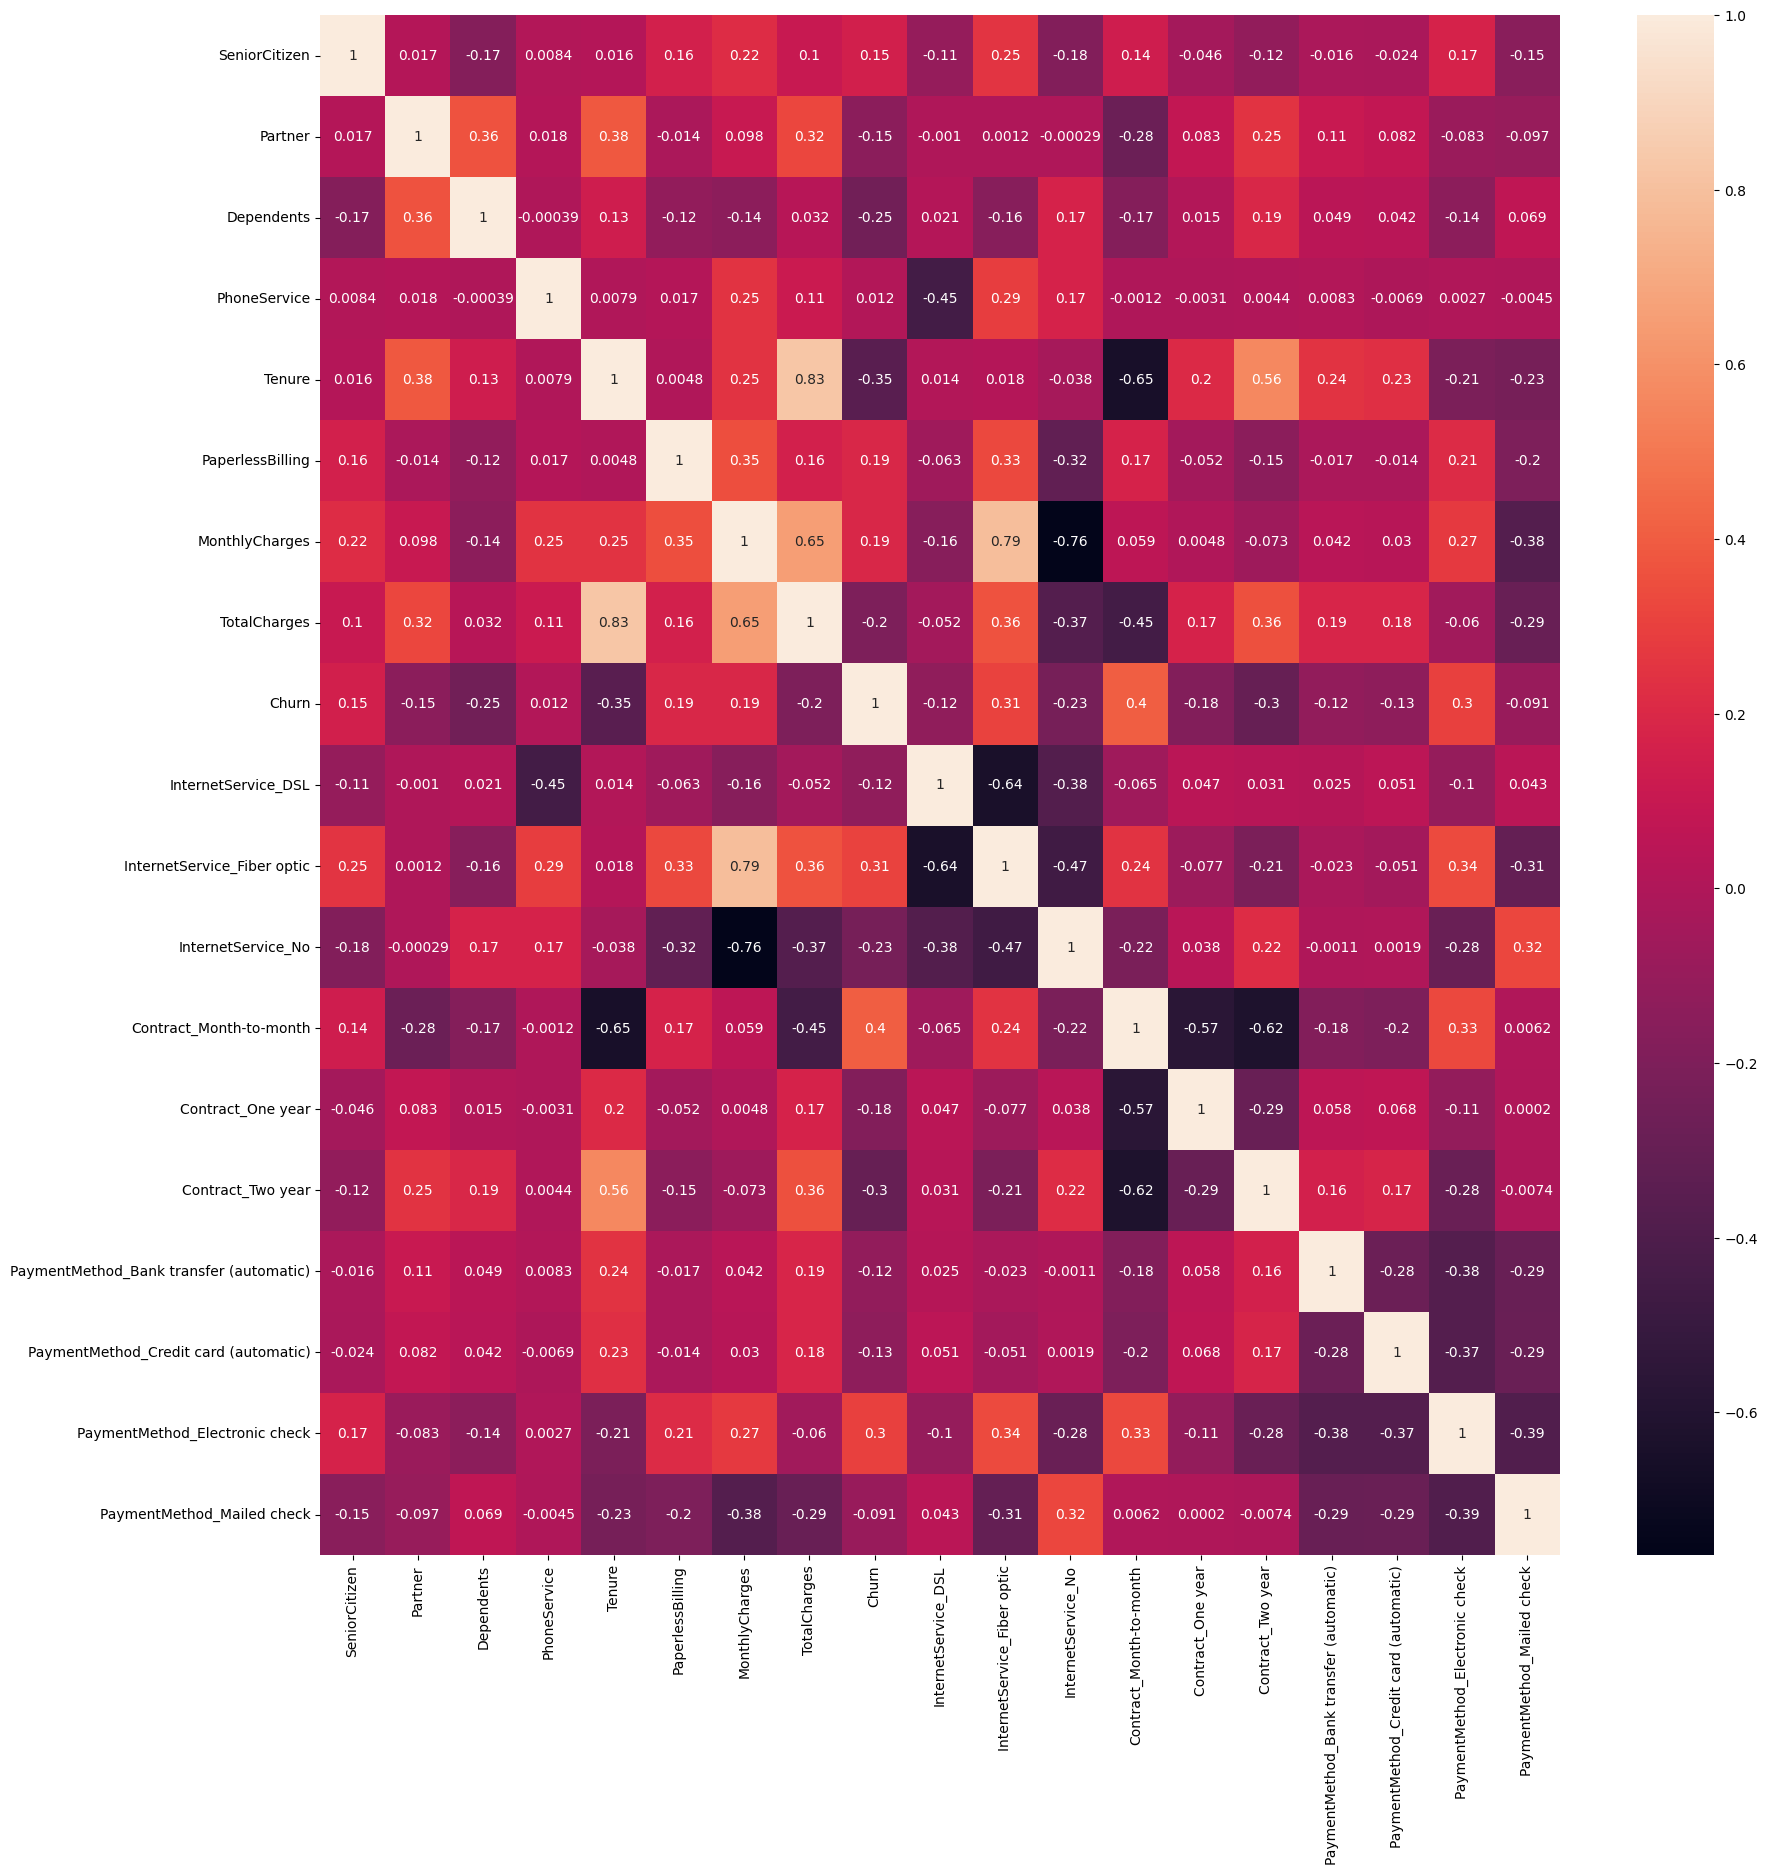

In [233]:
plt.figure(figsize=(20,20))
m_corr = df_new.corr()
m_corr_top = m_corr.index
sns.heatmap(df_new[m_corr_top].corr(), annot=True)

#### Vemos que hay caracteristicas que podemos eliminar para ir mejorando nuestro modelo como Phone Service, que tiene una correlacion bastante baja con nuestra variable objetivo ( Churn) igual Payment Method Mailed Check

####  Vamos a ver como nos va con el otro dataset que esta mas raw y tiene mas caracteristicas. dfStre.

In [156]:
X1 = dfStre.drop('Churn', axis=1)
y1 = dfStre['Churn']

In [157]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2,stratify=y, random_state=42)

In [149]:
print("Forma de X_train:", X1_train.shape)
print("Forma de X_test:", X1_test.shape)
print("Forma de y_train:", y1_train.shape)
print("Forma de y_test:", y1_test.shape)

Forma de X_train: (5625, 24)
Forma de X_test: (1407, 24)
Forma de y_train: (5625,)
Forma de y_test: (1407,)


In [162]:
lr.fit(X1_train, y1_train)
dt.fit(X1_train, y1_train)
rf.fit(X1_train, y1_train)

RandomForestClassifier()

In [163]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Logistic Regression
lr_pred = lr.predict(X1_test)
lr_accuracy = accuracy_score(y1_test, lr_pred)
lr_precision = precision_score(y1_test, lr_pred)
lr_recall = recall_score(y1_test, lr_pred)
lr_f1 = f1_score(y1_test, lr_pred)
lr_report = classification_report(y1_test, lr_pred)

print("Logistic Regression:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1-score:", lr_f1)
print("Classification Report:\n", lr_report)

# Decision Tree
dt_pred = dt.predict(X1_test)
dt_accuracy = accuracy_score(y1_test, dt_pred)
dt_precision = precision_score(y1_test, dt_pred)
dt_recall = recall_score(y1_test, dt_pred)
dt_f1 = f1_score(y1_test, dt_pred)
dt_report = classification_report(y1_test, dt_pred)

print("Decision Tree:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1-score:", dt_f1)
print("Classification Report:\n", dt_report)

# Random Forest
rf_pred = rf.predict(X1_test)
rf_accuracy = accuracy_score(y1_test, rf_pred)
rf_precision = precision_score(y1_test, rf_pred)
rf_recall = recall_score(y1_test, rf_pred)
rf_f1 = f1_score(y1_test, rf_pred)
rf_report = classification_report(y1_test, rf_pred)

print("Random Forest:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)
print("Classification Report:\n", rf_report)


Logistic Regression:
Accuracy: 0.8059701492537313
Precision: 0.6472303206997084
Recall: 0.5935828877005348
F1-score: 0.6192468619246861
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      1033
           1       0.65      0.59      0.62       374

    accuracy                           0.81      1407
   macro avg       0.75      0.74      0.74      1407
weighted avg       0.80      0.81      0.80      1407

Decision Tree:
Accuracy: 0.7299218194740583
Precision: 0.4920212765957447
Recall: 0.4946524064171123
F1-score: 0.49333333333333335
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1033
           1       0.49      0.49      0.49       374

    accuracy                           0.73      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.73      0.73      0.73      1407

Random Forest:
Accuracy: 0.7832

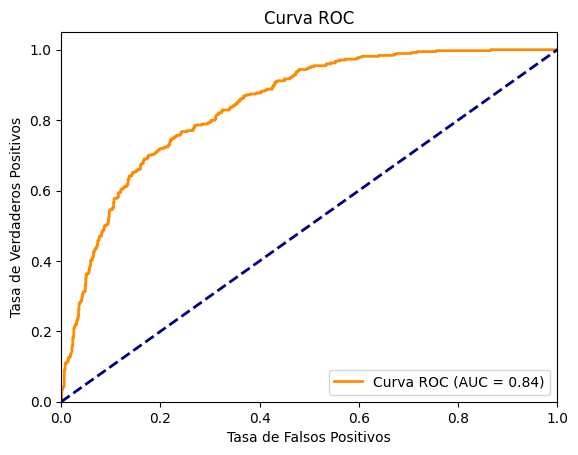

In [165]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcular las probabilidades de predicción para la clase positiva
probas = lr.predict_proba(X1_test)
probas = probas[:, 1]  # Obtener las probabilidades de la clase positiva

# Calcular la tasa de verdaderos positivos, la tasa de falsos positivos y los umbrales
fpr, tpr, thresholds = roc_curve(y_test, probas)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Trazar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## Vamos a probar suerte con XGBoost

In [184]:
# Aunque no es necesario, siempre me gusta Crear una matriz DMatrix para mejorar el rendimiento de xgboost.
dtrain = xgb.DMatrix(X1_train, label=y1_train)
dtest = xgb.DMatrix(X1_test, label=y1_test)

# Definir los parámetros del modelo
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

# Entrenar el modelo
num_round = 100
model = xgb.train(params, dtrain, num_round)

# Paso 6: Realizar predicciones
y_pred = model.predict(dtest)
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

# Paso 7: Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8002842928216063
Precision: 0.6388059701492538
Recall: 0.5721925133689839
F1-score: 0.6036671368124118


In [191]:
### Probamos eliminando dos columans mas

In [189]:
columns_del = ['PaymentMethod_Mailed check','PhoneService']

df_new.drop(columns_del, axis=1, inplace=True)

,SeniorCitizen,Partner,Dependents,Tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check
0,0,0,0,-1.239504,1,-0.363923,-0.959649,1,True,False,False,True,False,False,False,False,False
1,0,0,1,-1.239504,1,0.196178,-0.940457,1,False,True,False,True,False,False,False,False,True
2,0,0,1,-0.995040,1,1.158489,-0.645369,1,False,True,False,True,False,False,False,False,True
3,0,1,1,-0.180161,1,1.329677,0.336516,1,False,True,False,True,False,False,False,False,True
4,0,0,1,0.675462,1,1.293113,1.214589,1,False,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,0,1.612573,1,-1.450886,-0.381142,0,False,False,True,False,False,True,True,False,False
7028,0,1,1,-0.343137,1,0.664868,-0.129180,0,True,False,False,False,True,False,False,False,False
7029,0,1,1,1.612573,1,1.276493,2.241056,0,False,True,False,False,True,False,False,True,False
7030,0,1,1,-0.872808,1,-1.170004,-0.854514,0,True,False,False,True,False,False,False,False,True
